# NLP Preprocessing And Text Classification

**Course Name:** MDM Deep Learning

**Lab No. 4 :** NLP Preprocessing And Text Classification on BBC News Dataset

**Dataset Link -** https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

**Name -** Rohit Dahale

**PRN -** 202201070052

**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving all-data.csv to all-data (1).csv


In [4]:
import pandas as pd

# Load the CSV with proper encoding
df = pd.read_csv("all-data.csv", encoding='ISO-8859-1', header=None)

# Rename columns
df.columns = ['label', 'text']
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


Missing values:
 label             0
text              0
processed_text    0
dtype: int64

Data Types:
 label             object
text              object
processed_text    object
dtype: object


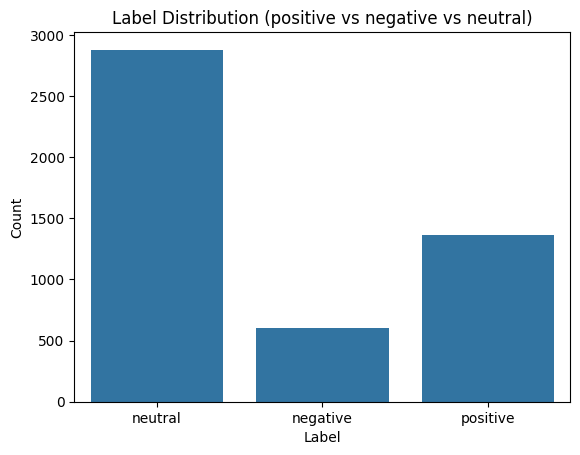

In [17]:
# Check for missing values in any column
print("Missing values:\n", df.isnull().sum())

# Print data types of each column
print("\nData Types:\n", df.dtypes)

# Visualize the distribution of labels (ham vs spam)
sns.countplot(x='label', data=df)
plt.title("Label Distribution (positive vs negative vs neutral)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [8]:
import nltk

nltk.download('punkt')           # For tokenization
nltk.download('stopwords')       # For removing stopwords
nltk.download('wordnet')         # For lemmatization
nltk.download('omw-1.4')         # WordNet data
nltk.download('punkt_tab')       # <- Specific one mentioned in error

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [10]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [stemmer.stem(lemmatizer.lemmatize(w)) for w in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
df[['label', 'processed_text']].head()

,label,processed_text
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less 100000...
2,negative,intern electron industri compani elcoteq laid ...
3,positive,new product plant compani would increas capac ...
4,positive,accord compani updat strategi year 20092012 ba...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['processed_text'])

In [12]:
# Count Vectorizer
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(df['processed_text'])

# Target labels
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

# Using TF-IDF for modeling
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.7381443298969073
Precision: 0.7558717224556394
Recall: 0.7381443298969073
F1 Score: 0.7121671058138577


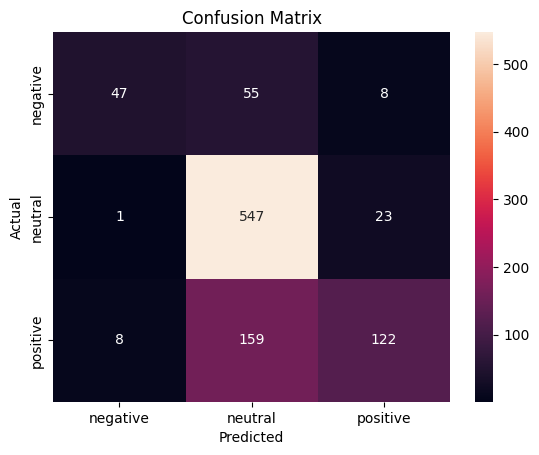


Classification Report:

              precision    recall  f1-score   support

    negative       0.84      0.43      0.57       110
     neutral       0.72      0.96      0.82       571
    positive       0.80      0.42      0.55       289

    accuracy                           0.74       970
   macro avg       0.79      0.60      0.65       970
weighted avg       0.76      0.74      0.71       970



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Discussion and Conclusion :                                              
After implementing the text classification pipeline using natural language processing (NLP) techniques on the Financial news dataset, the following model evaluation metrics were observed:

Accuracy: 0.73                                                            
Precision: 0.75                     
Recall: 0.73                                                            
F1 Score: 0.71

Declaration

I, Rohit Dahale, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:

Signature: Rohit R. Dahale